# Rechenaufgaben zu 3.4 (Anomalieerkennung)

Sei ein Datensatz gegeben durch

$$
E=\{(10,52),(11.5,31),(10,34),(11,40)\}
$$

Berechnen Sie für jedes Merkmal $i$:

1. den Mittelwert $\mu_i$
2. die Varianz $\sigma^2_i$

Sei nun $x_5=(9.5,55)$ ein neuer Datenpunkt und sei $\varepsilon= 0.9$.

3. Bestimmen Sie $p_E(x_5)$
4. Geben Sie an, ob es sich bei $x_5$ um einen abnormalen Punkt handelt.


In [11]:
import numpy as np

E=[(10,52),(11.5,31),(10,34),(11,40)]
merkmal_1 = [x[0] for x in E]
merkmal_2 = [x[1] for x in E]

mu_1 = sum(merkmal_1) / len(merkmal_1)
mu_2 = sum(merkmal_2) / len(merkmal_2)

quadratische_abstände_1 = [(x-mu_1)**2 for x in merkmal_1]
quadratische_abstände_2 = [(x-mu_2)**2 for x in merkmal_2]

sigma_sq_1 = sum(quadratische_abstände_1) / len(quadratische_abstände_1)
sigma_sq_2 = sum(quadratische_abstände_2) / len(quadratische_abstände_2)

print(f"mu_1: {mu_1:0.3f}")
print(f"mu_2: {mu_2:0.3f}")
print(f"sigma_1: {sigma_sq_1:0.3f}")
print(f"sigma_2: {sigma_sq_2:0.3f}")

print("="*20)

def normal_density(mu:float, sigma_sq:float, x: float) -> float:
    return 1/(np.sqrt(2*np.pi*sigma_sq))*np.exp(-(x-mu)**2/(2*sigma_sq))

def estimated_normal_density(x: tuple[float, float]) -> float:
    first_normal_density = normal_density(mu_1, sigma_sq_1, x[0])
    second_normal_density = normal_density(mu_2, sigma_sq_2, x[1])
    return first_normal_density*second_normal_density

density_for_x_5 = estimated_normal_density((9.5,55))
print(f"p_E(x_5)={density_for_x_5:0.3f}")
print(f"x_5 ist abnormal: {density_for_x_5 < 0.9}")

mu_1: 10.625
mu_2: 39.250
sigma_1: 0.422
sigma_2: 64.688
p_E(x_5)=0.001
x_5 ist abnormal: True


#### Bonus: Berechnung mit sklearn und Visualisierung der Decision Boundary


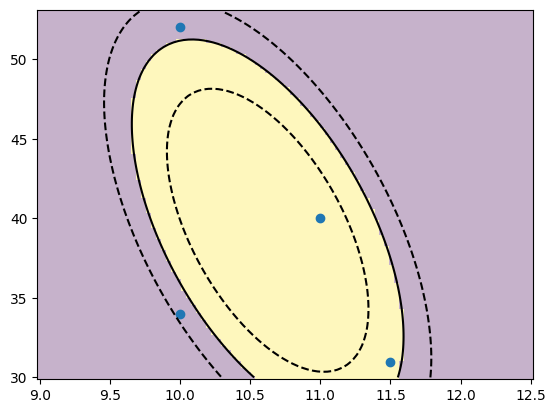

mu_1: 10.625
mu_2: 39.250
sigma_1: 0.422
sigma_2: 64.688


In [41]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.covariance import EllipticEnvelope
from sklearn.inspection import DecisionBoundaryDisplay

E=[(10,52),(11.5,31),(10,34),(11,40)]

ee = EllipticEnvelope(contamination=0.5).fit(E)

def plot_decision_boundary(model):
    _, ax = plt.subplots()
    common_params = {"estimator": model, "X": np.array(E), "ax": ax}
    DecisionBoundaryDisplay.from_estimator(**common_params, response_method="predict",
            plot_method="pcolormesh",
            alpha=0.3,)

    DecisionBoundaryDisplay.from_estimator(
        **common_params,
        response_method="decision_function",
        plot_method="contour",
        levels=[-1, 0, 1],
        colors=["k", "k", "k"],
        linestyles=["--", "-", "--"],
    )
    plt.scatter(*zip(*E))

    plt.show()

plot_decision_boundary(ee)

pred_mu_1, pred_mu_2 = ee.location_
pred_sigma_1 = ee.covariance_[0][0]
pred_sigma_2 = ee.covariance_[1][1]

print(f"mu_1: {pred_mu_1:0.3f}")
print(f"mu_2: {pred_mu_2:0.3f}")
print(f"sigma_1: {pred_sigma_1:0.3f}")
print(f"sigma_2: {pred_sigma_2:0.3f}")